# <b>데이터 전처리</b> Preprocessing

##### 라이브러리

In [217]:
import pandas as pd
import numpy as np

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from eunjeon import Mecab
from tqdm import tqdm # 진행상황 Progress Bar를 위한 tqdm library
from tensorflow.keras.preprocessing.text import Tokenizer

## <b>1.0 데이터 불러오기</b>

In [245]:
# 실습용자료 불러와 csv로 저장

# train = pd.read_table("./data/1. 실습용자료.txt", encoding='CP949', sep='|')
# train.to_csv('./data/train.csv', index=False)


#  불러와 csv로 저장

# test = pd.read_table("./data/2. 모델개발용자료.txt", encoding='CP949', sep='|')
# test.to_csv('./data/test.csv', index=False)

# 데이터 불러오기

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')


## <b>2.0 데이터 탐색</b>

In [246]:
print(train.head(), '\n')

print(test.head())

# 일련번호(AI_id), 산업대분류(digit_1), 산업중분류(digit_2), 산업소분류(digit_3), 사업 대상(text_obj), 사업 방법(text_mthd), 사업 취급품목(text_deal)

        AI_id digit_1  digit_2  digit_3    text_obj    text_mthd text_deal
0  id_0000001       S       95      952       카센터에서      자동차부분정비   타이어오일교환
1  id_0000002       G       47      472       상점내에서    일반인을 대상으로   채소.과일판매
2  id_0000003       G       46      467  절단하여사업체에도매    공업용고무를가지고    합성고무도매
3  id_0000004       G       47      475       영업점에서      일반소비자에게    열쇠잠금장치
4  id_0000005       Q       87      872        어린이집  보호자의 위탁을 받아   취학전아동보육 

       AI_id  digit_1  digit_2  digit_3  text_obj  text_mthd text_deal
0  id_000001      NaN      NaN      NaN   치킨전문점에서   고객의주문에의해      치킨판매
1  id_000002      NaN      NaN      NaN      산업공구  다른 소매업자에게    철물 수공구
2  id_000003      NaN      NaN      NaN       절에서   신도을 대상으로    불교단체운영
3  id_000004      NaN      NaN      NaN     영업장에서      고객요구로     자동차튜닝
4  id_000005      NaN      NaN      NaN  실내포장마차에서  접객시설을 갖추고   소주,맥주제공


In [135]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   AI_id      1000000 non-null  object
 1   digit_1    1000000 non-null  object
 2   digit_2    1000000 non-null  int64 
 3   digit_3    1000000 non-null  int64 
 4   text_obj   983323 non-null   object
 5   text_mthd  956381 non-null   object
 6   text_deal  932348 non-null   object
dtypes: int64(2), object(5)
memory usage: 53.4+ MB


In [136]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   AI_id      100000 non-null  object 
 1   digit_1    0 non-null       float64
 2   digit_2    0 non-null       float64
 3   digit_3    0 non-null       float64
 4   text_obj   98189 non-null   object 
 5   text_mthd  97032 non-null   object 
 6   text_deal  93839 non-null   object 
dtypes: float64(3), object(4)
memory usage: 5.3+ MB


## <b>3.0 데이터 정제</b>

In [247]:
train['text_obj'] = train['text_obj'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','').str.replace('^ +', '') # [ㄱ - ㅎ, ㅏ - ㅣ, 가 - 핳] 제외 제거
train['text_mthd'] = train['text_mthd'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','').str.replace('^ +', '') # [ㄱ - ㅎ, ㅏ - ㅣ, 가 - 핳] 제외 제거
train['text_deal'] = train['text_deal'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','').str.replace('^ +', '') # [ㄱ - ㅎ, ㅏ - ㅣ, 가 - 핳] 제외 제거

test['text_obj'] = test['text_obj'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','').str.replace('^ +', '')
test['text_mthd'] = test['text_mthd'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','').str.replace('^ +', '')
test['text_deal'] = test['text_deal'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','').str.replace('^ +', '')

<ipython-input-247-7dd7fb717b2d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train['text_obj'] = train['text_obj'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','').str.replace('^ +', '') # [ㄱ - ㅎ, ㅏ - ㅣ, 가 - 핳] 제외 제거
<ipython-input-247-7dd7fb717b2d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train['text_mthd'] = train['text_mthd'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','').str.replace('^ +', '') # [ㄱ - ㅎ, ㅏ - ㅣ, 가 - 핳] 제외 제거
<ipython-input-247-7dd7fb717b2d>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train['text_deal'] = train['text_deal'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','').str.replace('^ +', '') # [ㄱ - ㅎ, ㅏ - ㅣ, 가 - 핳] 제외 제거
<ipython-input-247-7dd7fb717b2d>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  test['text_obj'] = test['text_obj'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','').str.replace('^ +', '')
<ipython

### 결측치 처리

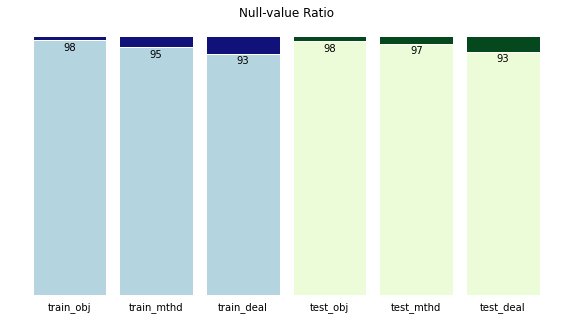

In [249]:
# 널값 비율

# Data
r1 , r2 = [0,1,2], [3,4,5] # for X row

train_data = {'notnull': [train['text_obj'].count(), train['text_mthd'].count(), train['text_deal'].count()],
            'isnull': [train['text_obj'].isnull().sum(), train['text_mthd'].isnull().sum(), train['text_deal'].isnull().sum()]}
test_data = {'notnull': [test['text_obj'].count(), test['text_mthd'].count(), test['text_deal'].count()],
            'isnull': [test['text_obj'].isnull().sum(), test['text_mthd'].isnull().sum(), test['text_deal'].isnull().sum()]}

train_data = pd.DataFrame(train_data)
test_data = pd.DataFrame(test_data)
 
# From raw value to percentage
train_totals = [i+j for i,j in zip(train_data['notnull'], train_data['isnull'])] # for train
train_notnull = [i / j * 100 for i,j in zip(train_data['notnull'], train_totals)]
train_isnull = [i / j * 100 for i,j in zip(train_data['isnull'], train_totals)]

test_totals = [i+j for i,j in zip(test_data['notnull'], test_data['isnull'])] # for test
test_notnull = [i / j * 100 for i,j in zip(test_data['notnull'], test_totals)]
test_isnull = [i / j * 100 for i,j in zip(test_data['isnull'], test_totals)]
 
# plot
plt.figure(figsize=(10, 5))
barWidth = 0.85

# Create train bars
plot1 = plt.bar(r1, train_notnull, color='#B4D4DF', edgecolor='white', width=barWidth)
plt.bar(r1, train_isnull, bottom=train_notnull, color='#11117A', edgecolor='white', width=barWidth)

# Create text bars
plot2 = plt.bar(r2, test_notnull, color='#EDFCD8', edgecolor='white', width=barWidth)
plt.bar(r2, test_isnull, bottom=test_notnull, color='#06481D', edgecolor='white', width=barWidth)

# Custom x axis
names = ('train_obj','train_mthd','train_deal','test_obj','test_mthd', 'test_deal')
plt.xticks(r1+r2, names)

for value in plot1:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             0.95*height,'%d' % int(height), ha='center', va='bottom')

for value in plot2:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             0.95*height,'%d' % int(height), ha='center', va='bottom')

# Hide spines and ticks
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tick_params(bottom=False)

# Title
plt.title("Null-value Ratio")

# Show graphic
plt.show()

In [170]:
# 결측값 탐색

condition1 = train['text_obj'].isnull() == True
condition2 = train['text_mthd'].isnull() == True
condition3 = train['text_deal'].isnull() == True

train[condition1&condition2&condition3] # 세 컬럼 모두 Null 값인 로우는 없음.

,AI_id,digit_1,digit_2,digit_3,text_obj,text_mthd,text_deal


In [250]:
print('Train 데이터 결측치 제거 전:', len(train))
train.dropna(inplace=True)
print('Train 데이터 결측치 제거 후:', len(train))

Train 데이터 결측치 제거 전: 1000000
Train 데이터 결측치 제거 후: 925009


In [251]:
print('Test 데이터 결측치 제거 전:', len(test))
test.drop(columns=['digit_1', 'digit_2', 'digit_3'], inplace=True)
test.dropna(inplace=True)
print('Test 데이터 결측치 제거 후:', len(test))

Test 데이터 결측치 제거 전: 100000
Test 데이터 결측치 제거 후: 92985


##### 결측값 대치 보류 - 나중에 대치할 때 쓰려고 남겨둠

In [140]:
condition1 = train['text_obj'].isnull() == False
condition2 = train['text_mthd'].isnull() == False
condition3 = train['text_deal'].isnull() == True

train[condition1&condition2&condition3]

,AI_id,digit_1,digit_2,digit_3,text_obj,text_mthd,text_deal
10,id_0000011,C,10,102,멸치,"입고, 가공",NaN
29,id_0000030,C,29,292,Resim,"재료구입, 세미앗세이",NaN
115,id_0000116,G,47,478,향초 & 디퓨저,소매,NaN
194,id_0000195,C,26,262,"코아, 보빈","검선, 니드보강",NaN
234,id_0000235,C,32,320,"목재, 페인트","설계, 절단",NaN
...,...,...,...,...,...,...,...
999843,id_0999844,C,24,241,와이어롯드(절선),"산세수세, 피막",NaN
999846,id_0999847,C,13,139,PE섬유,"입고, 재단",NaN
999878,id_0999879,C,16,161,"목재, 페인트","도장, 방부처리",NaN
999899,id_0999900,C,32,320,합판,"합판, 재단",NaN


In [127]:
train[condition1&condition2&condition3].groupby(['text_obj', 'text_mthd'])['text_obj'].count().sort_values(ascending=False)

text_obj        text_mthd 
미용업             서비스           83
미용실             서비스           51
노래연습장           서비스           35
철판              입고, 절단        27
부동산중개업          부동산업          26
                              ..
벌꿀, 올리고당        추출, 농축         1
벌목,목재운반         임업관련서비스        1
벌크, 모래          입고, 수임검사       1
벌크.몰딩콤파운드       자재입고, 유압성형     1
히팅케이블, 히터및안전장치  주문, 재료입고       1
Name: text_obj, Length: 14511, dtype: int64

In [128]:
condition1 = train['text_obj'] == '미용업'
condition2 = train['text_mthd'] == '서비스'
train[condition1&condition2]

,AI_id,digit_1,digit_2,digit_3,text_obj,text_mthd,text_deal
214381,id_0214382,S,96,961,미용업,서비스,NaN
215125,id_0215126,S,96,961,미용업,서비스,NaN
216539,id_0216540,S,96,961,미용업,서비스,NaN
216634,id_0216635,S,96,961,미용업,서비스,NaN
217024,id_0217025,S,96,961,미용업,서비스,NaN
...,...,...,...,...,...,...,...
369825,id_0369826,S,96,961,미용업,서비스,헤어관리
369877,id_0369878,S,96,961,미용업,서비스,헤어미용서비스
370763,id_0370764,S,96,961,미용업,서비스,헤어샵
371112,id_0371113,S,96,961,미용업,서비스,헤어컷


In [94]:
condition1 = train['text_obj'] == '코아, 보빈'
condition2 = train['text_mthd'] == '입고, 재단'
train[condition1&condition2]

,AI_id,digit_1,digit_2,digit_3,text_obj,text_mthd,text_deal
194,id_0000195,C,26,262,"코아, 보빈","검선, 니드보강",NaN


## <b>4.0 토큰화</b>

In [252]:
# 불용어 사전 불러오기

stopwords = pd.read_csv("./data/stopwords/stopwords_1.csv", encoding='CP949')
stopwords = stopwords['stopwords']
print(len(stopwords))

stopwords_2 = pd.read_table("./data/stopwords/stopwords_2.txt", names=['stopwords', '품사', 'ratio'])
stopwords_2 = stopwords_2['stopwords']
print(len(stopwords_2))

# 불용어 사전 병합

stopwords = pd.concat([stopwords, stopwords_2], axis=0)
stopwords.drop_duplicates(inplace=True)
stopwords.reset_index(inplace=True, drop=True)
print(len(stopwords))

# stopwords.to_csv("./data/stopwords/stopwords_concat.csv", encoding='CP949') 
stopwords = list(stopwords)

677
100
664


In [ ]:
# train 데이터 토크나이징

mecab_train_text_obj = []
mecab_train_text_mthd = []
mecab_train_text_deal = []

mecab = Mecab()

for sentence in tqdm(train['text_obj']): # 진행상황 Progress Bar를 위한 tqdm library
    tokenized_sentence = mecab.morphs(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in list(stopwords)] # 불용어 제거
    mecab_train_text_obj.append(stopwords_removed_sentence)

for sentence in tqdm(train['text_mthd']): # 진행상황 Progress Bar를 위한 tqdm library
    tokenized_sentence = mecab.morphs(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in list(stopwords)] # 불용어 제거
    mecab_train_text_mthd.append(stopwords_removed_sentence)

for sentence in tqdm(train['text_deal']): # 진행상황 Progress Bar를 위한 tqdm library
    tokenized_sentence = mecab.morphs(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in list(stopwords)] # 불용어 제거
    mecab_train_text_deal.append(stopwords_removed_sentence)

In [204]:
# test 데이터 토크나이징

mecab_test_text_obj = []
mecab_test_text_mthd = []
mecab_test_text_deal = []

mecab = Mecab()

for sentence in tqdm(test['text_obj']): # 진행상황 Progress Bar를 위한 tqdm library
    tokenized_sentence = mecab.morphs(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in list(stopwords)] # 불용어 제거
    mecab_test_text_obj.append(stopwords_removed_sentence)

for sentence in tqdm(test['text_mthd']): # 진행상황 Progress Bar를 위한 tqdm library
    tokenized_sentence = mecab.morphs(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in list(stopwords)] # 불용어 제거
    mecab_test_text_mthd.append(stopwords_removed_sentence)

for sentence in tqdm(test['text_deal']): # 진행상황 Progress Bar를 위한 tqdm library
    tokenized_sentence = mecab.morphs(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in list(stopwords)] # 불용어 제거
    mecab_test_text_deal.append(stopwords_removed_sentence)

100%|██████████| 92985/92985 [00:04<00:00, 21670.97it/s]


In [210]:
train['text'] = mecab_train_text_obj
train['text'] = train['text'] + mecab_train_text_mthd
train['text'] = train['text'] + mecab_train_text_deal

In [207]:
test['text'] = mecab_test_text_obj
test['text'] = test['text'] + mecab_test_text_mthd
test['text'] = test['text'] + mecab_test_text_deal

C:\Users\Huitaek\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:69: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return op(a, b)


In [212]:
train.head()

,AI_id,digit_1,digit_2,digit_3,text_obj,text_mthd,text_deal,text
0,id_0000001,S,95,952,카센터에서,자동차부분정비,타이어오일교환,"[카센터, 자동차, 부분, 정비, 타이어, 교환]"
1,id_0000002,G,47,472,상점내에서,일반인을 대상으로,채소과일판매,"[상점, 일반인, 대상, 채소, 과일, 판매]"
2,id_0000003,G,46,467,절단하여사업체에도매,공업용고무를가지고,합성고무도매,"[절단, 사업체, 도매, 공업, 용, 고무, 고, 합성, 고무, 도매]"
3,id_0000004,G,47,475,영업점에서,일반소비자에게,열쇠잠금장치,"[영업, 일반, 소비자, 열쇠, 잠금장치]"
4,id_0000005,Q,87,872,어린이집,보호자의 위탁을 받아,취학전아동보육,"[어린이집, 보호자, 위탁, 취학전, 아동, 보육]"


In [214]:
test.head()

,AI_id,text_obj,text_mthd,text_deal,text
0,id_000001,치킨전문점에서,고객의주문에의해,치킨판매,"[치킨, 전문점, 고객, 주문, 치킨, 판매]"
1,id_000002,산업공구,다른 소매업자에게,철물 수공구,"[산업, 공구, 소매업자, 철물, 수공구]"
2,id_000003,절에서,신도을 대상으로,불교단체운영,"[절, 신도, 대상, 불교, 단체, 운영]"
3,id_000004,영업장에서,고객요구로,자동차튜닝,"[영업장, 고객, 요구, 자동차, 튜닝]"
4,id_000005,실내포장마차에서,접객시설을 갖추고,소주맥주제공,"[실내, 포장마차, 접객, 시설, 갖추, 고, 소주, 맥주, 제공]"


In [216]:
X_train = train['text']
X_train.to_csv('./data/mecab/tokenized_train.csv', index=False)

X_test = test['text']
X_test.to_csv('./data/mecab/tokenized_test.csv', index=False)

## <b>5.0 인코딩</b>

In [254]:
X_train = pd.read_csv('./data/mecab/tokenized_train.csv')
X_train = pd.Series(X_train['text'])

X_test = pd.read_csv("./data/mecab/tokenized_test.csv")
X_test = pd.Series(X_test['text'])

In [256]:
y_train = np.array(train[['digit_1', 'digit_2', 'digit_3']])

In [268]:
y_train

array([['I', 56, 562],
       ['I', 56, 561],
       ['M', 71, 711],
       ...,
       ['P', 85, 856],
       ['C', 26, 264],
       ['C', 16, 162]], dtype=object)

In [258]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

threshold = 3 # 등장 빈도 수의 threshold
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합(vocabulary)의 크기 : 32545
등장 빈도가 2번 이하인 희귀 단어의 수: 16775
단어 집합에서 희귀 단어의 비율: 51.54401597787679
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.3426075320681566
단어 집합의 크기 : 15771


In [259]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [260]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size= 0.2, random_state=1234)

## <b>6.0 패딩</b>

In [261]:
# 문장 길이가 0 인 로우 삭제

drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)

print('train data 개수: ', len(train))
print('test data 개수: ', len(test))

train data 개수:  925009
test data 개수:  92985


C:\Users\Huitaek\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


리뷰의 최대 길이 : 26
리뷰의 평균 길이 : 6.58999809459202


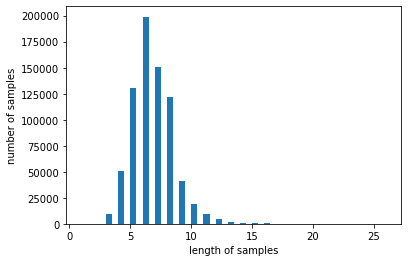

전체 샘플 중 길이가 10 이하인 샘플의 비율: 97.59594269721987


In [264]:
# max_len 결정

print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))

plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

def below_threshold_len(max_len, nested_list):
    count = 0
    for sentence in nested_list:
        if(len(sentence) <= max_len):
            count = count + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))
    
max_len = 10
below_threshold_len(max_len, X_train)

In [265]:
# max_len 에 맞게 데이터셋 패딩

from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [266]:
# 데이터 셋 저장

temp = pd.DataFrame(X_train)
temp.to_csv('./data/mecab/X_train.csv', index=False)
temp = pd.DataFrame(X_test)
temp.to_csv('./data/mecab/X_test.csv', index=False)
temp = pd.DataFrame(y_train)
temp.to_csv('./data/mecab/y_train.csv', index=False)
temp = pd.DataFrame(y_test)
temp.to_csv('./data/mecab/y_test.csv', index=False)

print(len(X_train), len(X_test), len(y_train), len(y_test))

739999 185002 739999 185002
